In [18]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, classification_report

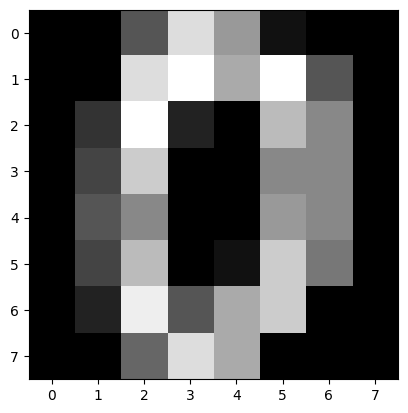

In [19]:
#loading digits dataset
from sklearn.datasets import load_digits
data_set = load_digits()
plt.imshow(data_set.images[0], cmap='gray')
plt.show()

In [20]:
#checking for dataset's properties
df = pd.DataFrame(data_set.data, columns=data_set.feature_names)
dir(data_set)

#selecting features and target
X = df.loc[:, data_set.feature_names].values
Y = data_set.target

#spliting traing and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=72)

#scaling the data for max number of iterations
scaler_lr = StandardScaler()
X_train = scaler_lr.fit_transform(X_train)
X_test = scaler_lr.transform(X_test)

#fit the model
model_lr = LogisticRegression(max_iter=1000) #(Madecraft and Galarnyk M., 2020)(Geron, 2017)
model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [21]:
#model prediction & evaluation
pred_lr = model_lr.predict(X_test)
bal_acc_lr = balanced_accuracy_score(Y_test, pred_lr) #measuring balanced accuracy (Scikit,2025)
f1_check_lr = f1_score(Y_test, pred_lr, average="weighted") #measuring F1 score (Scikit,2025)
roc_lr = roc_auc_score(Y_test, model_lr.predict_proba(X_test), multi_class="ovr", average="macro") #calculating ROC score (SCIKIT,2025)
acc_lr = accuracy_score(Y_test, pred_lr)
print("Accuracy based on default parameters LR:", bal_acc_lr)
print("\nF1 score based on default parameters of LR:", f1_check_lr)
print("\nROC AUC Score:", roc_lr)
print("\nAccuracy", acc_lr)

Accuracy based on default parameters LR: 0.9691643488803308

F1 score based on default parameters of LR: 0.9693485280138984

ROC AUC Score: 0.9990346230721286

Accuracy 0.9694444444444444


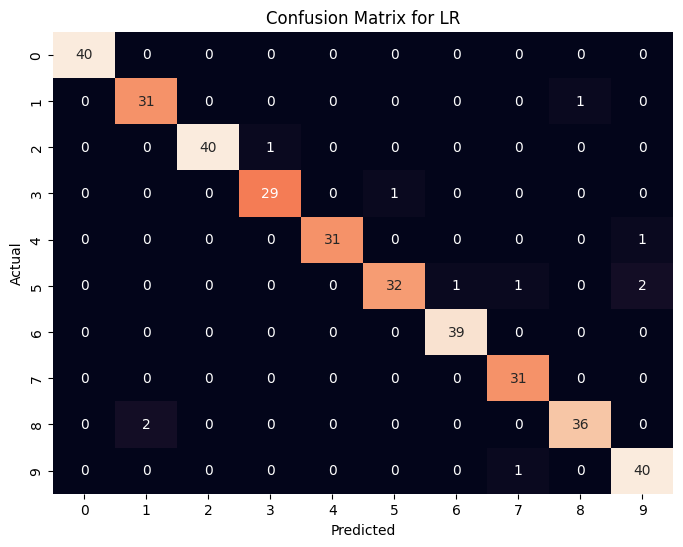

In [22]:
#Confusion matrix
cm_lr = confusion_matrix(Y_test, pred_lr)

#ploting the matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LR")
plt.show()

In [23]:
#Hypertuning parameters for Logistic Regression (Scikit,2025)(Geron, 2017)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

param_grid = {
    "C": [1, 10, 100],
    "penalty": ["l1", "l2"], #Certain hyperparameters, such as elasticnet and none for the penalty parameter, were excluded from the tuning process due to their incompatibility with specific solvers in the logistic regression implementation. Additionally, these parameters were omitted to optimize computational efficiency, as their inclusion would significantly increase the computational complexity and runtime of the hyperparameter search process while not contributing to accuracy improvement
    "solver": ["saga"], #solver compatible with l1 and l2
    "max_iter": [10000] #Setting a high number to allow the algorithm enough iterations to give optimal sets of parameters

}

grid_search_lr = GridSearchCV(model_lr, param_grid= param_grid, cv=5, verbose=True)
grid_search_lr.fit(X_train, Y_train)

print("\nOptimal parameters of LR:", grid_search_lr.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Optimal parameters of LR: {'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}


In [24]:
#Predicting classes for digits dataset with optimal set of parameters
optimal_model_lr = grid_search_lr.best_estimator_
optimal_pred_lr = optimal_model_lr.predict(X_test)

print("Balanced Accuracy based on optimal parameters of LR:", balanced_accuracy_score(Y_test, optimal_pred_lr))

Balanced Accuracy based on optimal parameters of LR: 0.9644409677649408


ROC AUC Score of Optimal LR: 0.9988010695140892


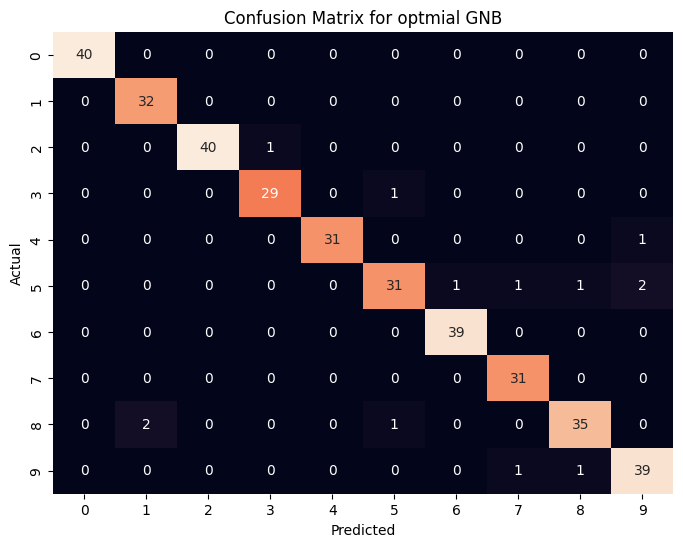

In [25]:
#Results for LR with optimal parameters
#ROC
roc_optmial_model_lr = roc_auc_score(Y_test, optimal_model_lr.predict_proba(X_test), multi_class="ovr", average="macro")
print("ROC AUC Score of Optimal LR:", roc_optmial_model_lr)

#Confusion matrix
cm_optimal_model_lr = confusion_matrix(Y_test, optimal_pred_lr)

#ploting the matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_optimal_model_lr, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for optmial GNB")
plt.show()